<a href="https://colab.research.google.com/github/mariadelmarac/An-lisis-de-Reportes-de-Delitos-de-Violencia-Intrafamiliar-con-Google-Colab/blob/main/An%C3%A1lisis_de_Reportes_de_Delitos_de_Violencia_Intrafamiliar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv"
df = pd.read_csv(file_path)

print(df.head())

   DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  
0   1/01/2010  MASCULINO      ADULTOS         1  
1   1/01/2010   FEMENINO      ADULTOS         1  
2   1/01/2010  MASCULINO      ADULTOS         1  
3   1/01/2010   FEMENINO      ADULTOS         1  
4   1/01/2010   FEMENINO      ADULTOS         1  


/tmp/ipython-input-1-979865529.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [3]:
df.describe()

,CANTIDAD
count,476970.000000
mean,1.707764
std,3.338647
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,130.000000


In [4]:
df.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,2
FECHA HECHO,0
GENERO,3
GRUPO ETARIO,1615
CANTIDAD,0


In [5]:
df.duplicated().sum()

np.int64(46876)

In [6]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Unique values in column {col}: {values}")
    print(f"Number of unique values'{len(values)}'")
    print()

Unique values in column DEPARTAMENTO: ['ATLÁNTICO' 'BOYACÁ' 'CAQUETÁ' 'CASANARE' 'CUNDINAMARCA' 'SUCRE' 'VALLE'
 'HUILA' 'ANTIOQUIA' 'ARAUCA' 'BOLÍVAR' 'CALDAS' 'CAUCA' 'CESAR' 'CHOCÓ'
 'CÓRDOBA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'PUTUMAYO'
 'RISARALDA' 'SANTANDER' 'TOLIMA' 'VAUPÉS' 'GUAVIARE' 'GUAJIRA' 'QUINDÍO'
 'AMAZONAS' 'VICHADA' 'GUAINÍA' 'SAN ANDRÉS' 'NO REPORTA']
Number of unique values'33'

Unique values in column MUNICIPIO: ['BARRANQUILLA (CT)' 'DUITAMA' 'PUERTO RICO' ... 'CEPITÁ' 'RÍO QUITO'
 'NOROSÍ']
Number of unique values'1022'

Unique values in column CODIGO DANE: [8001000 15238000 18592000 ... 27600000 44420000 68160000]
Number of unique values'2193'

Unique values in column ARMAS MEDIOS: ['ARMA BLANCA / CORTOPUNZANTE' 'ARMA DE FUEGO' 'CONTUNDENTES' 'CORTANTES'
 'CORTOPUNZANTES' 'NO REPORTADO' 'PUNZANTES' 'SIN EMPLEO DE ARMAS'
 'NO REPORTA' 'ESCOPOLAMINA' '-' nan]
Number of unique values'12'

Unique values in column FECHA HECHO: ['1/01/2010' '2/01/2010' 

In [7]:
df_cleaned = df.drop_duplicates()

df_cleaned.loc[:, 'GENERO'] = df_cleaned['GENERO'].replace(['-', 'NO REPORTA'], np.nan)
df_cleaned = df_cleaned.dropna(subset=['GENERO'])
df_cleaned.loc[:, 'GENERO'] = df_cleaned['GENERO'].str.upper()

df_cleaned['ARMAS MEDIOS'] = df_cleaned['ARMAS MEDIOS'].replace(['-', 'NO REPORTA', 'NO REPORTADO'], np.nan)
df_cleaned = df_cleaned.dropna(subset=['ARMAS MEDIOS'])
df_cleaned.loc[:, 'ARMAS MEDIOS'] = df_cleaned['ARMAS MEDIOS'].str.upper()

df_cleaned['GRUPO ETARIO'] = df_cleaned['GRUPO ETARIO'].replace(['-', 'NO REPORTA'], np.nan)
df_cleaned = df_cleaned.dropna(subset=['GRUPO ETARIO'])
df_cleaned.loc[:, 'GRUPO ETARIO'] = df_cleaned['GRUPO ETARIO'].str.upper()

print(df_cleaned)

        DEPARTAMENTO            MUNICIPIO CODIGO DANE  \
0          ATLÁNTICO    BARRANQUILLA (CT)     8001000   
1             BOYACÁ              DUITAMA    15238000   
2            CAQUETÁ          PUERTO RICO    18592000   
3           CASANARE                 MANÍ    85139000   
4       CUNDINAMARCA     BOGOTÁ D.C. (CT)    11001000   
...              ...                  ...         ...   
476963       VICHADA  PUERTO CARREÑO (CT)    99001000   
476964       VICHADA        SANTA ROSALÍA    99624000   
476965       VICHADA        SANTA ROSALÍA    99624000   
476966       VICHADA        SANTA ROSALÍA    99624000   
476967       VICHADA        SANTA ROSALÍA    99624000   

                       ARMAS MEDIOS FECHA HECHO     GENERO GRUPO ETARIO  \
0       ARMA BLANCA / CORTOPUNZANTE   1/01/2010  MASCULINO      ADULTOS   
1       ARMA BLANCA / CORTOPUNZANTE   1/01/2010   FEMENINO      ADULTOS   
2       ARMA BLANCA / CORTOPUNZANTE   1/01/2010  MASCULINO      ADULTOS   
3       ARMA BL

In [8]:
unique_values = {col: df_cleaned[col].unique() for col in df_cleaned.columns}

for col, values in unique_values.items():
    print(f"Unique values in column {col}: {values}")
    print(f"Number of unique values'{len(values)}'")
    print()

Unique values in column DEPARTAMENTO: ['ATLÁNTICO' 'BOYACÁ' 'CAQUETÁ' 'CASANARE' 'CUNDINAMARCA' 'SUCRE' 'VALLE'
 'HUILA' 'ANTIOQUIA' 'ARAUCA' 'BOLÍVAR' 'CALDAS' 'CAUCA' 'CESAR' 'CHOCÓ'
 'CÓRDOBA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'PUTUMAYO'
 'RISARALDA' 'SANTANDER' 'TOLIMA' 'GUAVIARE' 'GUAJIRA' 'QUINDÍO'
 'AMAZONAS' 'VICHADA' 'GUAINÍA' 'SAN ANDRÉS' 'VAUPÉS' 'NO REPORTA']
Number of unique values'33'

Unique values in column MUNICIPIO: ['BARRANQUILLA (CT)' 'DUITAMA' 'PUERTO RICO' ... 'RÍO QUITO' 'RECETOR'
 'NOROSÍ']
Number of unique values'1021'

Unique values in column CODIGO DANE: [8001000 15238000 18592000 ... 85279000 44420000 68160000]
Number of unique values'2188'

Unique values in column ARMAS MEDIOS: ['ARMA BLANCA / CORTOPUNZANTE' 'ARMA DE FUEGO' 'CONTUNDENTES' 'CORTANTES'
 'CORTOPUNZANTES' 'PUNZANTES' 'SIN EMPLEO DE ARMAS' 'ESCOPOLAMINA']
Number of unique values'8'

Unique values in column FECHA HECHO: ['1/01/2010' '2/01/2010' '3/01/2010' ... '44250' '44262' '4430

In [9]:
# Paso 1: Convertir todos los valores de la columna 'FECHA HECHO' a cadenas (str)
df_cleaned['FECHA HECHO'] = df_cleaned['FECHA HECHO'].astype(str)

# Paso 2: Identificar si los valores son numéricos (fechas de Excel)
es_serial = df_cleaned['FECHA HECHO'].str.isnumeric()

# Paso 3: Convertir fechas numéricas de Excel a fechas legibles
df_cleaned.loc[es_serial, 'FECHA HECHO_NUM'] = pd.to_datetime(
    df_cleaned.loc[es_serial, 'FECHA HECHO'].astype(int), origin='1899-12-30', unit='D'
)

# Paso 4: Convertir fechas en formato legible a fechas estandarizadas
df_cleaned.loc[~es_serial, 'FECHA HECHO_NUM'] = pd.to_datetime(
    df_cleaned.loc[~es_serial, 'FECHA HECHO'], format='mixed', errors='coerce'
)

# Paso 5: Crear una columna final con las fechas estandarizadas
df_cleaned['FECHA HECHO_FINAL'] = df_cleaned['FECHA HECHO_NUM']

# Paso 6: Eliminar la columna temporal
df_cleaned.drop(columns=['FECHA HECHO_NUM'], inplace=True)

print(df_cleaned)

        DEPARTAMENTO            MUNICIPIO CODIGO DANE  \
0          ATLÁNTICO    BARRANQUILLA (CT)     8001000   
1             BOYACÁ              DUITAMA    15238000   
2            CAQUETÁ          PUERTO RICO    18592000   
3           CASANARE                 MANÍ    85139000   
4       CUNDINAMARCA     BOGOTÁ D.C. (CT)    11001000   
...              ...                  ...         ...   
476963       VICHADA  PUERTO CARREÑO (CT)    99001000   
476964       VICHADA        SANTA ROSALÍA    99624000   
476965       VICHADA        SANTA ROSALÍA    99624000   
476966       VICHADA        SANTA ROSALÍA    99624000   
476967       VICHADA        SANTA ROSALÍA    99624000   

                       ARMAS MEDIOS FECHA HECHO     GENERO GRUPO ETARIO  \
0       ARMA BLANCA / CORTOPUNZANTE   1/01/2010  MASCULINO      ADULTOS   
1       ARMA BLANCA / CORTOPUNZANTE   1/01/2010   FEMENINO      ADULTOS   
2       ARMA BLANCA / CORTOPUNZANTE   1/01/2010  MASCULINO      ADULTOS   
3       ARMA BL

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373254 entries, 0 to 476967
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DEPARTAMENTO       373254 non-null  object        
 1   MUNICIPIO          373254 non-null  object        
 2   CODIGO DANE        373254 non-null  object        
 3   ARMAS MEDIOS       373254 non-null  object        
 4   FECHA HECHO        373254 non-null  object        
 5   GENERO             373254 non-null  object        
 6   GRUPO ETARIO       373254 non-null  object        
 7   CANTIDAD           373254 non-null  int64         
 8   FECHA HECHO_FINAL  373254 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 28.5+ MB


In [11]:
df_cleaned.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0
FECHA HECHO_FINAL,0


In [12]:
df_cleaned.duplicated().sum()

np.int64(0)

In [13]:
df_cleaned.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,FECHA HECHO_FINAL
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01


In [14]:
df_cleaned.drop(columns=['FECHA HECHO'], inplace=True)

In [15]:
df_cleaned.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,FECHA HECHO_FINAL
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010-01-01
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010-01-01
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010-01-01
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010-01-01
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010-01-01


In [16]:
df_cleaned['Year'] = df_cleaned['FECHA HECHO_FINAL'].dt.year
df_cleaned['Month'] = df_cleaned['FECHA HECHO_FINAL'].dt.month
df_cleaned['Day'] = df_cleaned['FECHA HECHO_FINAL'].dt.day
df_cleaned.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,FECHA HECHO_FINAL,Year,Month,Day
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010-01-01,2010,1,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010-01-01,2010,1,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1


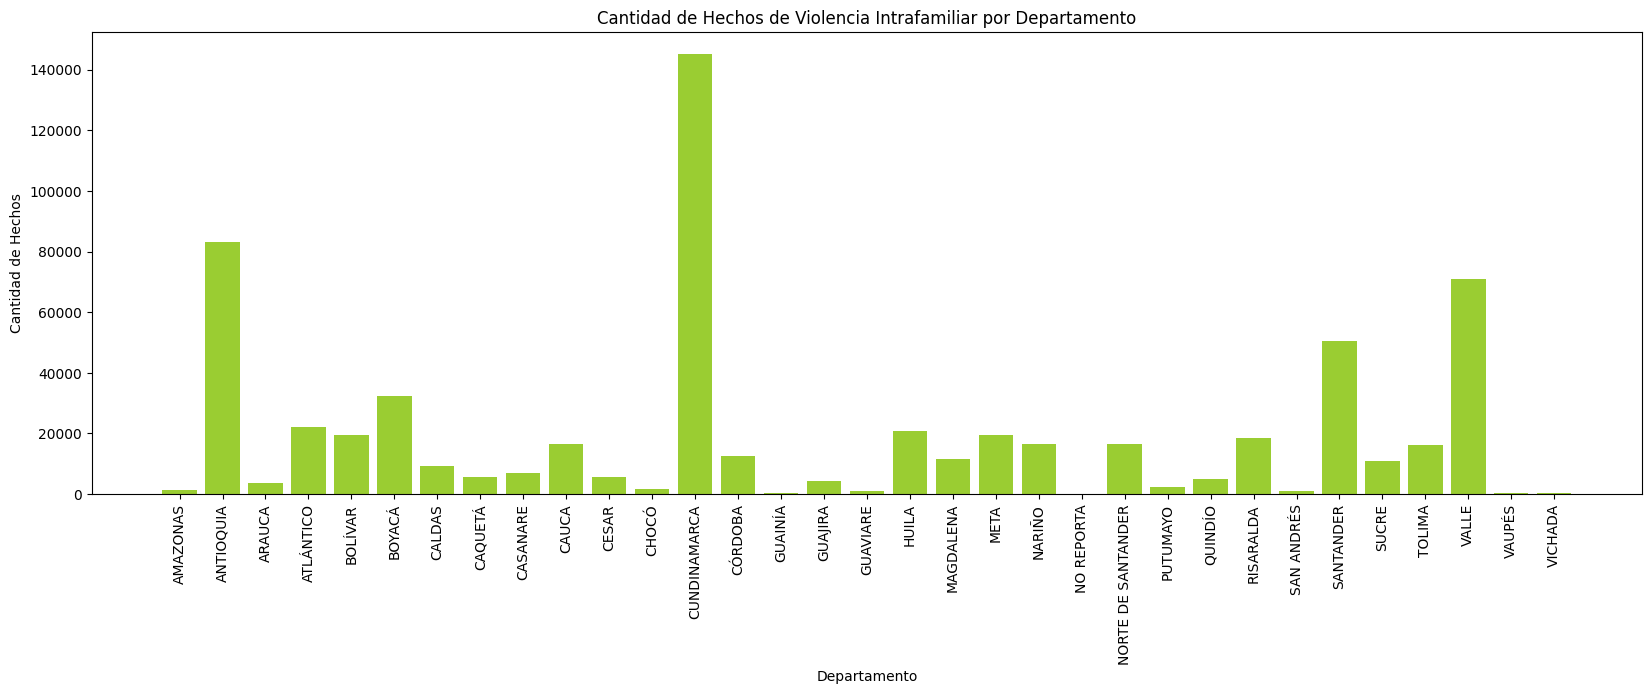

In [18]:
cases_by_department = df_cleaned.groupby('DEPARTAMENTO')['CANTIDAD'].sum()
plt.figure(figsize=(20, 6))
plt.bar(cases_by_department.index, cases_by_department.values, color='yellowgreen')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Hechos')
plt.title('Cantidad de Hechos de Violencia Intrafamiliar por Departamento')
plt.xticks(rotation=90)
plt.show()

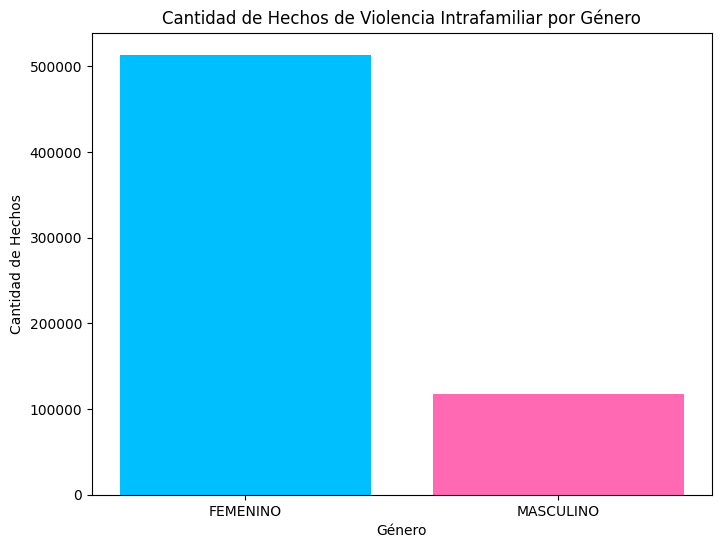

In [20]:
cases_by_gender = df_cleaned.groupby('GENERO')['CANTIDAD'].sum()
plt.figure(figsize=(8, 6))
plt.bar(cases_by_gender.index, cases_by_gender.values, color=['deepskyblue', 'hotpink'])
plt.xlabel('Género')
plt.ylabel('Cantidad de Hechos')
plt.title('Cantidad de Hechos de Violencia Intrafamiliar por Género')
plt.show()

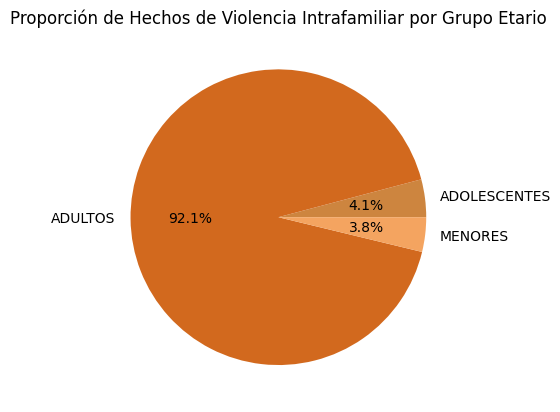

In [23]:
cases_bye_age_group = df_cleaned.groupby('GRUPO ETARIO')['CANTIDAD'].sum()
plt.pie(cases_bye_age_group, labels=cases_bye_age_group.index, autopct='%1.1f%%', colors=['peru', 'chocolate', 'sandybrown'])
plt.title('Proporción de Hechos de Violencia Intrafamiliar por Grupo Etario')
plt.show()

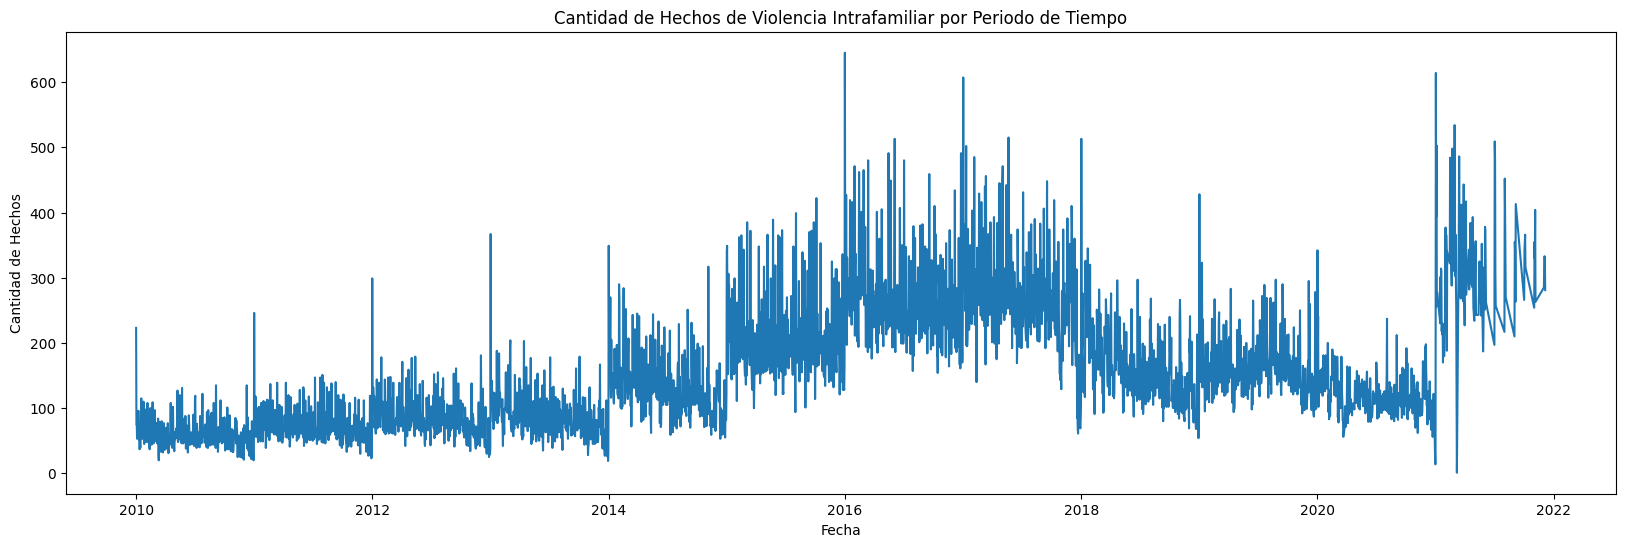

In [25]:
cases_by_date = df_cleaned.groupby('FECHA HECHO_FINAL')['CANTIDAD'].sum()
plt.figure(figsize=(20, 6))
plt.plot(cases_by_date.index, cases_by_date.values)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Hechos')
plt.title('Cantidad de Hechos de Violencia Intrafamiliar por Periodo de Tiempo')
plt.show()